Note: this can take a long time to run

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split

from sklearn.utils import shuffle
print(tf.__version__)


import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
font = fm.FontProperties()
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def hide_spines(intx=False,inty=False,logscale=0):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font) 
        
    plt.xticks([])
    plt.yticks([])
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            #ax.spines['right'].set_color('none')
            #ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yminorticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_ymajorticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (logscale):
                ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % (math.log(v,10)) )))
def show(nm,a=0,b=0,logscale=0):
    hide_spines(a,b,logscale)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    
    plt.savefig(nm, bbox_inches='tight');
    plt.show()
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
#this line is only needed in iPython notebooks
%matplotlib inline
loaded = np.load('venus_radar_slice.npz')

2.6.0


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.6.0
Hub version: 0.12.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


2021-09-01 11:43:21.837953: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print("Pre-shuffle shape ", loaded['X'].shape)
X,Y  = shuffle(loaded['X'], loaded['Y'], random_state = 42)
print("Post-shuffle shape ", loaded['X'].shape)
x_train,x_valid,y_train,y_valid=train_test_split(X, Y, test_size=0.20, random_state=42) 
w, h = 240, 240
#y_train=(y_train>0)*1
#y_valid=(y_valid>0)*1
print(y_train.shape,x_train.shape)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)/255
x_train = x_train.reshape(x_train.shape[0], w, h, 1)/255
x_train_3 = np.zeros((x_train.shape[0],x_train.shape[1],x_train.shape[2],3))
x_valid_3 = np.zeros((x_valid.shape[0],x_valid.shape[1],x_valid.shape[2],3))
print(x_train_3.shape)
for i in range(3):
    x_train_3[:,:,:,i] = x_train[:,:,:,0]
    x_valid_3[:,:,:,i] = x_valid[:,:,:,0]
x_train = x_train_3
x_valid = x_valid_3
print(x_train.shape,x_valid.shape, y_train.shape,y_valid.shape)
#y_valid = tf.keras.utils.to_categorical(y_valid, 2)
#y_train = tf.keras.utils.to_categorical(y_train, 2)

Pre-shuffle shape  (11596, 57600)
Post-shuffle shape  (11596, 57600)
(9276, 5) (9276, 57600)
(9276, 240, 240, 3)
(9276, 240, 240, 3) (2320, 240, 240, 3) (9276, 5) (2320, 5)


In [5]:
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Conv2D(filters=3, kernel_size=4, padding='same', activation='relu', input_shape=(1024,1024,1))) 
#model.add(tf.keras.layers.AveragePooling2D(pool_size=4))
model.add(hub.KerasLayer("https://tfhub.dev/google/efficientnet/b1/classification/1",trainable=False))
#model.add(tf.keras.layers.Dropout(0.01, name="dropout_out_eff"))
#model.add(tf.keras.layers.Dense(10, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.05, name="dropout_out"))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
model.build([None, 240, 240, 3])
'''tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.AveragePooling2D(pool_size=2, input_shape=(1024,1024,1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=8, padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=8))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=4))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=2, padding='same', activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=4))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
# Take a look at the model summary
'''

model.summary()
#depth

2021-09-01 11:46:26.907048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1000)              7856232   
_________________________________________________________________
dense (Dense)                (None, 5)                 5005      
Total params: 7,861,237
Trainable params: 5,005
Non-trainable params: 7,856,232
_________________________________________________________________


In [6]:

checkpointer = keras.callbacks.ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.compile(loss='categorical_crossentropy', 
             optimizer=tf.keras.optimizers.Adam(), #tf.keras.optimizers.SGD(lr=0.005, momentum=0.9),
             metrics=['accuracy'])

In [7]:
history = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=100,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/100
290/290 [==============================] - 309s 1s/step - loss: 1.4110 - accuracy: 0.4039 - val_loss: 1.3469 - val_accuracy: 0.4306

Epoch 00001: val_loss improved from inf to 1.34693, saving model to model.weights.best.hdf5
Epoch 2/100
290/290 [==============================] - 284s 978ms/step - loss: 1.3251 - accuracy: 0.4480 - val_loss: 1.2947 - val_accuracy: 0.4552

Epoch 00002: val_loss improved from 1.34693 to 1.29466, saving model to model.weights.best.hdf5
Epoch 3/100
290/290 [==============================] - 2813s 10s/step - loss: 1.2849 - accuracy: 0.4655 - val_loss: 1.3519 - val_accuracy: 0.4427

Epoch 00003: val_loss did not improve from 1.29466
Epoch 4/100
290/290 [==============================] - 633s 2s/step - loss: 1.2786 - accuracy: 0.4714 - val_loss: 1.2980 - val_accuracy: 0.4474

Epoch 00004: val_loss did not improve from 1.29466
Epoch 5/100
290/290 [==============================] - 521s 2s/step - loss: 1.2627 - accuracy: 0.4776 - val_loss: 1.2841 - va


Epoch 00039: val_loss did not improve from 1.19053
Epoch 40/100
290/290 [==============================] - 272s 938ms/step - loss: 1.1087 - accuracy: 0.5536 - val_loss: 1.2282 - val_accuracy: 0.5108

Epoch 00040: val_loss did not improve from 1.19053
Epoch 41/100
290/290 [==============================] - 267s 921ms/step - loss: 1.1152 - accuracy: 0.5495 - val_loss: 1.2214 - val_accuracy: 0.5078

Epoch 00041: val_loss did not improve from 1.19053
Epoch 42/100
290/290 [==============================] - 267s 922ms/step - loss: 1.0967 - accuracy: 0.5577 - val_loss: 1.1997 - val_accuracy: 0.5332

Epoch 00042: val_loss did not improve from 1.19053
Epoch 43/100
290/290 [==============================] - 270s 931ms/step - loss: 1.1067 - accuracy: 0.5508 - val_loss: 1.2008 - val_accuracy: 0.5112

Epoch 00043: val_loss did not improve from 1.19053
Epoch 44/100
290/290 [==============================] - 276s 953ms/step - loss: 1.1000 - accuracy: 0.5526 - val_loss: 1.1933 - val_accuracy: 0.5267


290/290 [==============================] - 2805s 10s/step - loss: 1.0553 - accuracy: 0.5825 - val_loss: 1.2566 - val_accuracy: 0.4884

Epoch 00080: val_loss did not improve from 1.16224
Epoch 81/100
290/290 [==============================] - 649s 2s/step - loss: 1.0561 - accuracy: 0.5776 - val_loss: 1.2029 - val_accuracy: 0.5220

Epoch 00081: val_loss did not improve from 1.16224
Epoch 82/100
290/290 [==============================] - 3129s 11s/step - loss: 1.0533 - accuracy: 0.5738 - val_loss: 1.1529 - val_accuracy: 0.5522

Epoch 00082: val_loss improved from 1.16224 to 1.15286, saving model to model.weights.best.hdf5
Epoch 83/100
290/290 [==============================] - 362s 1s/step - loss: 1.0543 - accuracy: 0.5748 - val_loss: 1.1647 - val_accuracy: 0.5284

Epoch 00083: val_loss did not improve from 1.15286
Epoch 84/100
290/290 [==============================] - 278s 960ms/step - loss: 1.0449 - accuracy: 0.5817 - val_loss: 1.1554 - val_accuracy: 0.5362

Epoch 00084: val_loss did n

In [12]:

model.load_weights("model.weights.best.hdf5")
yhat = model.predict(x_valid)
#get accuracy, two-high, and yes/no
total_acc = 0.
two_high = 0.
bin_acc = 0.
yhat = model.predict(x_valid)
N = x_valid.shape[0]

for i in range(N):
    if (y_valid[i,np.argmax(yhat[i,:])] == np.max(y_valid[i,:])):
        total_acc += 1
        two_high += 1
    elif (y_valid[i,np.argmin(np.abs(yhat[i,:] - np.sort(yhat[i,:])[-2]))] == np.max(y_valid[i,:])):
        two_high += 1
    if ( (np.argmax(yhat[i,:]) < 4) and (np.argmax(y_valid[i,:]) < 4) ):
        bin_acc += 1
    elif ( (np.argmax(yhat[i,:]) == 4) and (np.argmax(y_valid[i,:]) == 4) ):
        bin_acc += 1

print("Total acc:", total_acc/N, "\nTop Two:", two_high/N, "\nYes/No:", bin_acc/N)
        

KeyboardInterrupt: 

In [ ]:
i = np.random.randint(low=0,high=N,size=1)[0]
print(i,y_valid[i,:],yhat[i,:])
y_valid[i,np.argmin(np.abs(yhat[i,:] - np.sort(yhat[i,:])[-2]))]

print(np.argmax(yhat[:,0]))

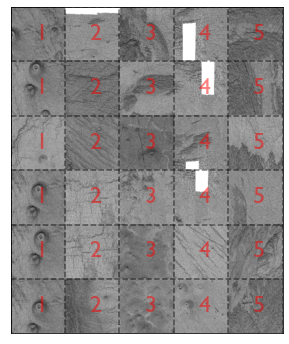

In [10]:
def_sort = np.sort(yhat[:,0])
width = x_valid.shape[1]
height = x_valid.shape[2]
canvas = np.zeros((6*width,5*height))

fig=plt.figure(figsize=(5,6))
ax = plt.gca()
skip = 1
for j in range(5):
    
    def_sort = np.sort(yhat[np.argmax(yhat,axis=1)==np.argmax(y_valid,axis=1),j])
    for i in range(6):
        if (j==0):
            plt.axvline(x=i*width-0.5, linestyle="--", color="black", alpha=0.5)
        if ((i>=5) and (j==0)) or ((i>=4) and (j==1)):
            case = np.argmin(np.abs(yhat[:,j] - def_sort[-(i+3+j)]))
        else:
            case = np.argmin(np.abs(yhat[:,j] - def_sort[-(i+1)]))
        canvas[i*width:(i+1)*width,j*height:(j+1)*height] = x_valid[case,:,:,0]
        ax.text((j+0.45)*height,(i+0.6)*width,str(np.argmax(y_valid[case,:])+1),fontsize=24,
                alpha=0.5,color="red",fontfamily="Gill Sans")
    plt.axhline(y=j*height-0.5, linestyle="--", color="black", alpha=0.5)

plt.axhline(y=(j+1)*height-0.5, linestyle="--", color="black", alpha=0.5)
ax.imshow(canvas, cmap=plt.cm.binary)
show("volcano_pred.pdf")

(3419,)
6288 [1.2231803e-06 4.8805326e-03 8.1630802e-01 4.8035834e-02 1.3077436e-01] [0. 0. 0. 1. 0.] 2 3
3609 [8.889376e-01 5.756427e-05 8.884761e-04 6.827722e-02 4.183929e-02] [0. 0. 0. 1. 0.] 0 3
6031 [0.8860321  0.00253988 0.04061925 0.06138723 0.00942163] [0. 0. 0. 1. 0.] 0 3
6415 [0.81119436 0.00509522 0.06844854 0.09344172 0.02182023] [0. 0. 0. 1. 0.] 0 3
6738 [0.79705405 0.00767281 0.0509718  0.08465081 0.05965052] [0. 0. 0. 1. 0.] 0 3
3822 [0.7115734  0.01576411 0.23101313 0.00448483 0.03716454] [0. 0. 1. 0. 0.] 0 2
(2872,)
4165 [7.5904361e-05 1.6781849e-05 2.1964458e-01 2.2303423e-01 5.5722851e-01] [0. 0. 0. 1. 0.] 4 3
6048 [1.0432467e-03 8.5446554e-01 2.2793701e-02 5.3064330e-05 1.2164443e-01] [0. 0. 0. 0. 1.] 1 4
4932 [0.03604235 0.79109114 0.01296267 0.06686631 0.0930376 ] [0. 0. 0. 0. 1.] 1 4
8071 [0.00974374 0.71026725 0.15392542 0.08930779 0.03675586] [0. 0. 0. 1. 0.] 1 3
976 [0.00078939 0.709988   0.17123689 0.0575234  0.0604623 ] [0. 0. 0. 0. 1.] 1 4
2723 [0.0921884  

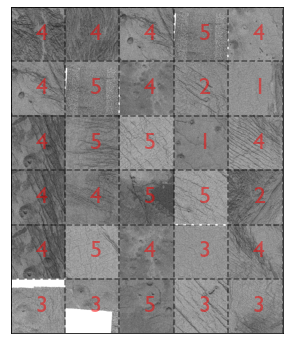

In [13]:
def_sort = np.sort(yhat[:,0])
width = x_valid.shape[1]
height = x_valid.shape[2]
canvas = np.zeros((6*width,5*height))

yhat = model.predict(x_train)
fig=plt.figure(figsize=(5,6))
ax = plt.gca()
skip = 1
found =[]
for j in range(5):
    
    def_sort = np.sort(yhat[(np.argmax(yhat,axis=1)!=np.argmax(y_train,axis=1))* 
                            (y_train[:,j]!=1),j])
    print(def_sort.shape)
    for i in range(6):
        if (j==0):
            plt.axvline(x=i*width-0.5, linestyle="--", color="black", alpha=0.5)
        if (j==4) and (i<-1):
            case = np.argmin(np.abs(yhat[:,j] - def_sort[-(i+10)]))
        else:
            case = np.argmin(np.abs(yhat[:,j] - def_sort[-i]))
            if (case==6):
                case = np.argmin(np.abs(yhat[:,j] - def_sort[-i-50]))
                print(case)
        print(case, yhat[case,:], y_train[case,:], np.argmax(yhat,axis=1)[case],np.argmax(y_train,axis=1)[case])
        if (np.argmax(yhat[case,:]) != np.argmax(y_train[case,:])):
            canvas[i*width:(i+1)*width,j*height:(j+1)*height] = x_train[case,:,:,0]
            ax.text((j+0.45)*height,(i+0.6)*width,str(np.argmax(y_train[case,:])+1),fontsize=24,
                    alpha=0.5,color="red",fontfamily="Gill Sans")
    plt.axhline(y=j*height-0.5, linestyle="--", color="black", alpha=0.5)

plt.axhline(y=(j+1)*height-0.5, linestyle="--", color="black", alpha=0.5)
ax.imshow(canvas, cmap=plt.cm.binary)
show("volcano_pred_wrong.pdf")